In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.neighbors import NearestNeighbors
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Running Weather - Log.csv')
print(df.shape)
df.head()

(27, 17)


,Date,Start Time,Temp,Feels Like,Wind,Sky,Precip,Mi,Type,Felt,Top1,Top2,Bottom1,Bottom2,Head Warmth,Head Hat,Hands
0,10/18/22,1:00 PM,45,35,15,Cloudy or Night,None,3.0,Easy,Perfect,Blue Nike Tech Tee,Chicago Marathon quarter zip,Nike Calf Crops,NaN,Bondi Band,NaN,Old Navy tech gloves (removed)
1,10/20/22,9:00 AM,40,30,10,Sunny,None,3.0,Easy,Perfect,Teal Nike base,Teal UA funnel neck,Nike unlined tights,NaN,Bondi Band,NaN,Old Navy tech gloves (removed)
2,11/13/22,3:15 PM,35,30,5,Cloudy or Night,None,3.0,Easy,Cold,Blue Nathan base,Run Mag Mile sunset half zip,Nike tights with mesh backs of knees,NaN,wool single layer,baseball cap,NaN
3,11/18/22,10:15 AM,30,20,10,Sunny,None,3.0,Easy,Cold,Black smartwool base,Blue smartwool half zip,Black Athleta Rainier tights,NaN,wool double layer,baseball cap,Sugoi gloves
4,11/28/22,10:00 AM,40,35,5,Sunny,None,3.0,Easy,Warm,Black smartwool base,black smartwool half zip,Black purple Athleta tights,NaN,wool single layer,baseball cap,NaN


In [3]:
df.columns

Index(['Date', 'Start Time', 'Temp', 'Feels Like', 'Wind', 'Sky', 'Precip',
       'Mi', 'Type', 'Felt', 'Top1', 'Top2', 'Bottom1', 'Bottom2',
       'Head Warmth', 'Head Hat', 'Hands'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         27 non-null     object 
 1   Start Time   27 non-null     object 
 2   Temp         27 non-null     int64  
 3   Feels Like   27 non-null     int64  
 4   Wind         27 non-null     int64  
 5   Sky          27 non-null     object 
 6   Precip       27 non-null     object 
 7   Mi           27 non-null     float64
 8   Type         27 non-null     object 
 9   Felt         27 non-null     object 
 10  Top1         27 non-null     object 
 11  Top2         23 non-null     object 
 12  Bottom1      27 non-null     object 
 13  Bottom2      2 non-null      object 
 14  Head Warmth  19 non-null     object 
 15  Head Hat     12 non-null     object 
 16  Hands        17 non-null     object 
dtypes: float64(1), int64(3), object(13)
memory usage: 3.7+ KB


In [5]:
df.describe()

,Temp,Feels Like,Wind,Mi
count,27.000000,27.000000,27.000000,27.000000
mean,38.333333,32.962963,7.777778,3.425926
std,6.793662,8.798957,2.886751,0.689254
min,20.000000,10.000000,5.000000,2.000000
25%,35.000000,30.000000,5.000000,3.000000
50%,40.000000,35.000000,10.000000,3.000000
75%,40.000000,40.000000,10.000000,4.000000
max,50.000000,45.000000,15.000000,5.000000


# Visualize Weather Conditions

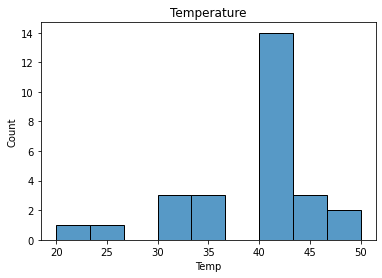

In [6]:
sns.histplot(data=df, x="Temp");
plt.title("Temperature");

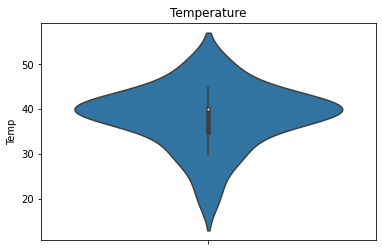

In [7]:
sns.violinplot(data=df, y="Temp");
plt.title("Temperature");

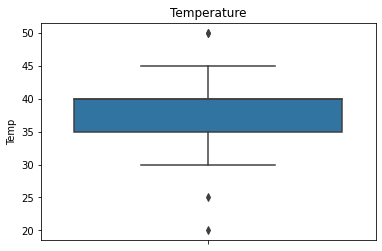

In [8]:
sns.boxplot(data=df, y="Temp");
plt.title("Temperature");

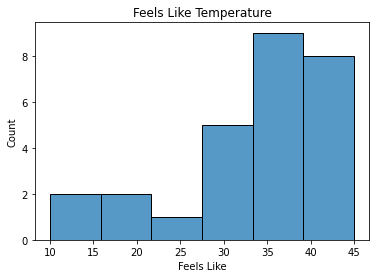

In [9]:
sns.histplot(data=df, x="Feels Like");
plt.title("Feels Like Temperature");

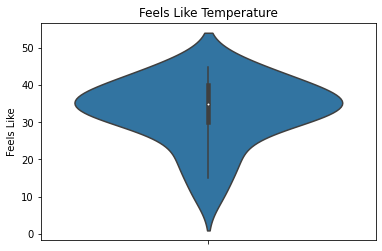

In [10]:
sns.violinplot(data=df, y="Feels Like");
plt.title("Feels Like Temperature");

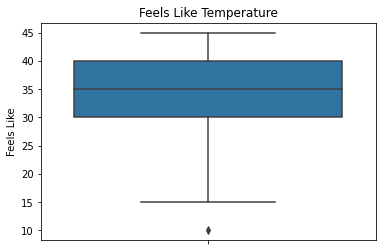

In [11]:
sns.boxplot(data=df, y="Feels Like");
plt.title("Feels Like Temperature");

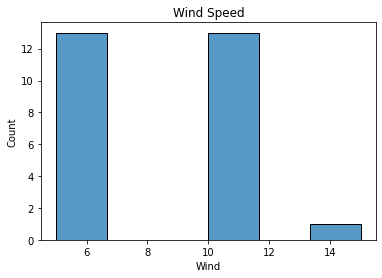

In [12]:
sns.histplot(data=df, x="Wind");
plt.title("Wind Speed");

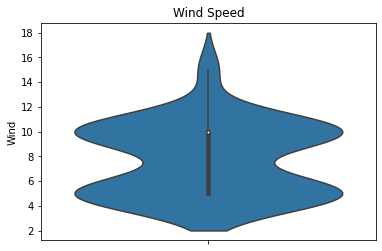

In [13]:
sns.violinplot(data=df, y="Wind");
plt.title("Wind Speed");

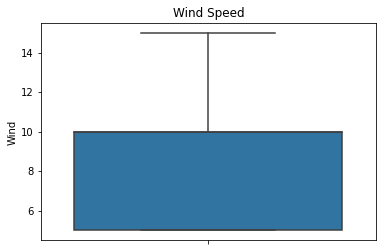

In [14]:
sns.boxplot(data=df, y="Wind");
plt.title("Wind Speed");

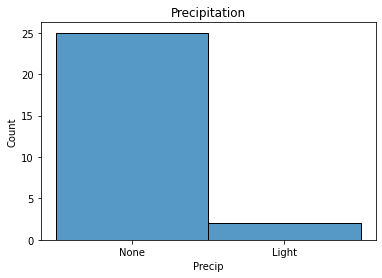

In [15]:
sns.histplot(data=df, x="Precip");
plt.title("Precipitation");

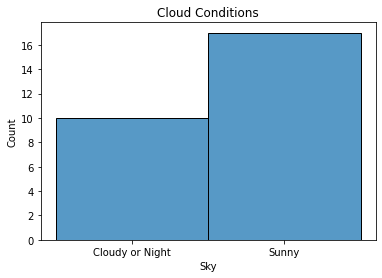

In [16]:
sns.histplot(data=df, x="Sky");
plt.title("Cloud Conditions");

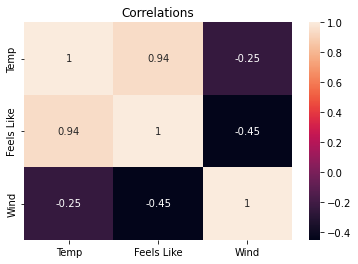

In [17]:
df_corr = df[['Temp', 'Feels Like', 'Wind']].copy()
sns.heatmap(df_corr.corr(), annot=True);
plt.title("Correlations");

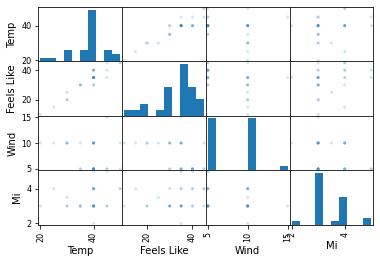

In [18]:
pd.plotting.scatter_matrix(df, alpha=0.2);

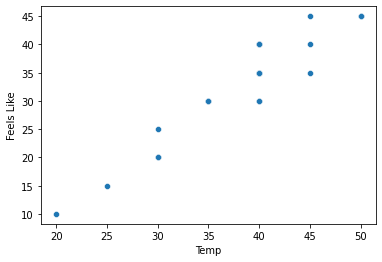

In [19]:
sns.scatterplot(data=df, x="Temp", y="Feels Like"); 

# Clean Data

In [20]:
# create dummies 

sky_d = pd.get_dummies(df['Sky'])
precip_d = pd.get_dummies(df['Precip'])

df = pd.concat([df, sky_d, precip_d], axis=1)

df.head()

,Date,Start Time,Temp,Feels Like,Wind,Sky,Precip,Mi,Type,Felt,...,Top2,Bottom1,Bottom2,Head Warmth,Head Hat,Hands,Cloudy or Night,Sunny,Light,None
0,10/18/22,1:00 PM,45,35,15,Cloudy or Night,None,3.0,Easy,Perfect,...,Chicago Marathon quarter zip,Nike Calf Crops,NaN,Bondi Band,NaN,Old Navy tech gloves (removed),1,0,0,1
1,10/20/22,9:00 AM,40,30,10,Sunny,None,3.0,Easy,Perfect,...,Teal UA funnel neck,Nike unlined tights,NaN,Bondi Band,NaN,Old Navy tech gloves (removed),0,1,0,1
2,11/13/22,3:15 PM,35,30,5,Cloudy or Night,None,3.0,Easy,Cold,...,Run Mag Mile sunset half zip,Nike tights with mesh backs of knees,NaN,wool single layer,baseball cap,NaN,1,0,0,1
3,11/18/22,10:15 AM,30,20,10,Sunny,None,3.0,Easy,Cold,...,Blue smartwool half zip,Black Athleta Rainier tights,NaN,wool double layer,baseball cap,Sugoi gloves,0,1,0,1
4,11/28/22,10:00 AM,40,35,5,Sunny,None,3.0,Easy,Warm,...,black smartwool half zip,Black purple Athleta tights,NaN,wool single layer,baseball cap,NaN,0,1,0,1


# Predict Feels Like Temp

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import metrics

In [22]:
# separate dependent variable from independent varibles 
y = np.array(df['Feels Like']).reshape(-1, 1)
X = df[['Temp', 'Wind', 'Sunny','Light']]

In [23]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 5, test_size= 0.25)

In [24]:
ss = preprocessing.StandardScaler()
X_train_ss = ss.fit_transform(X_train)
X_test_ss = ss.transform(X_test)

y_train_ss = ss.fit_transform(y_train)
y_test_ss = ss.transform(y_test)

In [25]:
# fit model 
lr = LinearRegression().fit(X_train_ss, y_train_ss)

In [26]:
# check error 
pred = lr.predict(X_train_ss)
print('MAE on train:', metrics.mean_absolute_error(y_train_ss, pred))
pred = lr.predict(X_test_ss)
print('MAE on test:', metrics.mean_absolute_error(y_test_ss, pred))

MAE on train: 0.19203508820226903
MAE on test: 0.3122583421991222


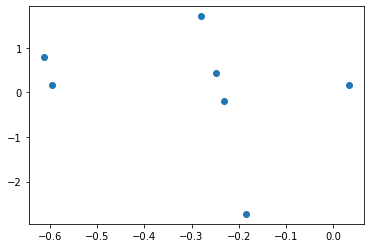

In [27]:
# check residuals 

residuals = y_test_ss - pred
plt.scatter(residuals, pred)
plt.show()

In [28]:
# unscale to check values 

y_test_inverse = ss.inverse_transform(y_test_ss)
pred_inverse = ss.inverse_transform(pred)

np.set_printoptions(suppress=True)

print(y_test_inverse)
print(pred_inverse)

[[35.]
 [45.]
 [30.]
 [10.]
 [35.]
 [35.]
 [30.]]
[[37.00302725]
 [47.2653885 ]
 [34.81331988]
 [11.49596367]
 [39.9445005 ]
 [34.73763875]
 [31.87184662]]


# Recommend Running Clothes

In [29]:
#df.head()

In [30]:
def what_to_wear(df, rec):
    '''print recommendations of what to wear'''

    print('You should wear:')
    print('Top, base:   ', df.iloc[rec]['Top1'])
    print('Top, mid:    ', df.iloc[rec]['Top2'])
    print('Bottom, base:', df.iloc[rec]['Bottom1'])
    print('Bottom, top: ', df.iloc[rec]['Bottom2'])
    print('Head Warmth: ', df.iloc[rec]['Head Warmth'])
    print('Head Hat:    ', df.iloc[rec]['Head Hat'])
    print('Hands:       ', df.iloc[rec]['Hands'])

    print('\nConditions the last time you wore this:')
    print('Temp:', df.iloc[rec]['Temp'], ', Feels Like:', df.iloc[rec]['Feels Like'], ', Wind:', df.iloc[rec]['Wind'], 
          ', Sunny:', df.iloc[rec]['Sunny'], ', Precip:', df.iloc[rec]['Light'])

In [31]:
samples = df[['Temp', 'Feels Like', 'Wind', 'Sunny', 'Light']].copy()

In [32]:
neigh = NearestNeighbors(n_neighbors=1)
neigh.fit(samples)

NearestNeighbors(n_neighbors=1)

In [33]:
temp = 45
feels_like = 40
wind = 5
sunny = 0
precip = 1

rec = neigh.kneighbors([[temp,feels_like,wind,sunny,precip]], return_distance=False)[0][0]

what_to_wear(df, rec)

You should wear:
Top, base:    Blue Nathan base
Top, mid:     New Balance half zip
Bottom, base: Nike unlined tights
Bottom, top:  nan
Head Warmth:  nan
Head Hat:     baseball cap
Hands:        nan

Conditions the last time you wore this:
Temp: 45 , Feels Like: 40 , Wind: 5 , Sunny: 1 , Precip: 0
